In [2]:
# import general classes for data processing
import ruptures as rpt
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import seaborn as sns

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# import custom classes 
from model import Signal, GestureRecognitionModel
from model import GestureRecognitionDataset

# import SVM classes
from sklearn.svm import SVC  # Support Vector Classifier
from sklearn.preprocessing import StandardScaler

# import MLP
from sklearn.neural_network import MLPClassifier

# import for loop and XGboost
from tqdm.notebook import tqdm
from xgboost import XGBClassifier

# import ensemble function and random forest
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier

# import model saving
import joblib

# kappa score
from sklearn.metrics import accuracy_score, cohen_kappa_score

# plotting cmap
from matplotlib.cm import get_cmap

## transition removal


In [1]:

signal = Signal(path_to_file=path_to_file)
#  add zeros to signal
num_zeros = 10 
zeros_to_add = np.zeros((num_zeros, signal.signal.shape[1]))  # Assuming signal.signal is a 2D array
signal.signal = np.concatenate((zeros_to_add, signal.signal), axis=0)

signal.remove_transition(algorithm="Binseg")

# Now 'signal' contains the signal after the change point
signal.display(attr="energy", w=5)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "c:\Users\fents\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3457, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\fents\AppData\Local\Temp\ipykernel_20924\1984850468.py", line 1, in <module>
    signal = Signal(path_to_file=path_to_file)
NameError: name 'Signal' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\fents\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2077, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\fents\anaconda3\lib\site-packages\IPython\core\ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File 

TypeError: object of type 'NoneType' has no len()

10


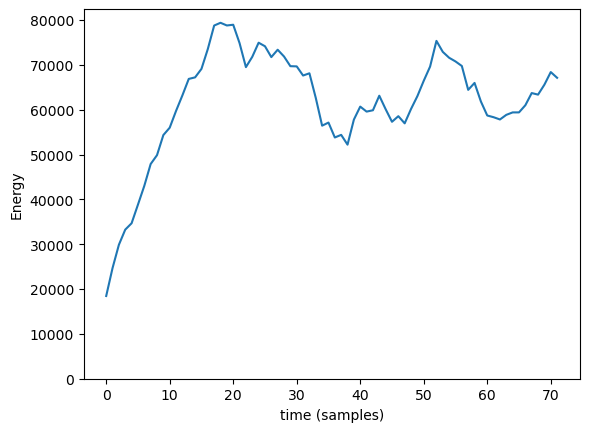

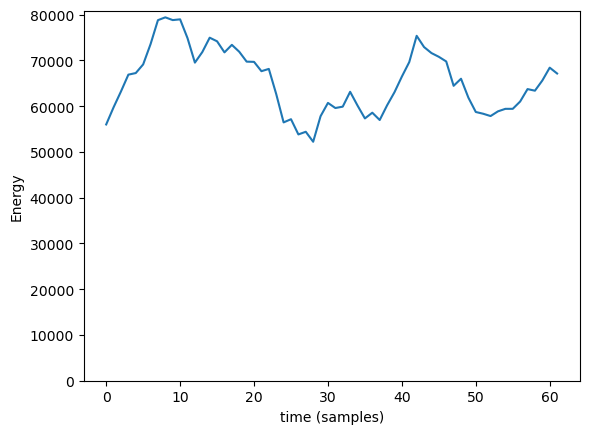

In [421]:
# do not run, results stored for meeting

signalpath_notransition = "data\Mario2\ClosedHand_3.npy"
min_s = 10
transition = "on"
add_transition = "off"

if transition == "on":
    path_to_file = "data\dataJoel\Joel1\ThumbAbduction_3.npy"
else:
    path_to_file = signalpath_notransition

signal = Signal(path_to_file=path_to_file)

if add_transition == "on":
    num_zeros = 25
    zeros_to_add = np.zeros((num_zeros, signal.signal.shape[1]))  # assuming signal.signal is a 2D array
    signal.signal = np.concatenate((zeros_to_add, signal.signal), axis=0)
else:
    signal.signal = signal.signal 

signal.display(attr="energy", w=5)

step = 10

# initialize change point detection with Pelt
s = signal.get_features(list_features=["mav"]).sum(axis=1)

algo = rpt.Pelt(model="l2", min_size=min_s).fit(s)
result = algo.predict(pen=20)[0]
print(result)
limit = (0.25*signal.signal.shape[0])/step

if result > limit:
    result = round((0*signal.signal.shape[0])/step)

trans_idx = result*step

# remove phase of transition
signal.signal = signal.signal[trans_idx:, :]
signal.n_samples = signal.signal.shape[0]

signal.display(attr="energy", w=5)

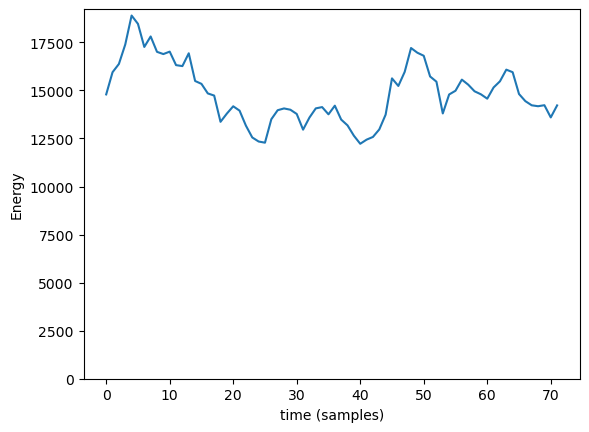

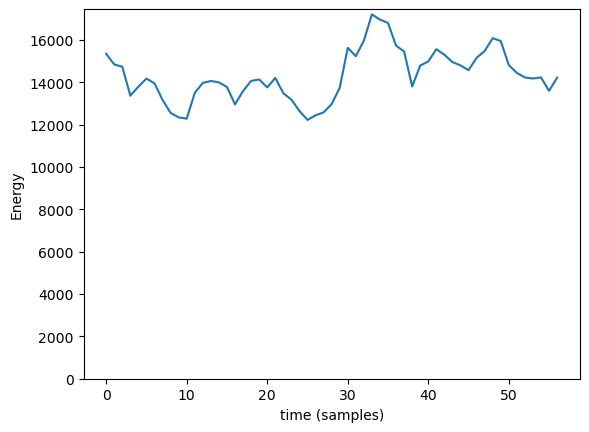

In [459]:
# do not run, results stored for meeting

signalpath_notransition = "data\Mario2\ClosedHand_3.npy"
min_s = 10

transition = "off"
add_transition = "off"

if transition == "on":
    path_to_file = "data\dataJoel\Joel1\ThumbAbduction_3.npy"
else:
    path_to_file = signalpath_notransition

signal = Signal(path_to_file=path_to_file)

if add_transition == "on":
    num_zeros = 25
    zeros_to_add = np.zeros((num_zeros, signal.signal.shape[1]))  # assuming signal.signal is a 2D array
    signal.signal = np.concatenate((zeros_to_add, signal.signal), axis=0)
else:
    signal.signal = signal.signal 
    
signal.display(attr="energy", w=5)
step = 10

limit = (0.25*signal.signal.shape[0])/step 
result = signal.signal.shape[0]/step

while result > limit:
    min_s -= 1 
    if min_s < 1: 
        break

    # initialize change point detection with Pelt
    s = signal.get_features(list_features=["mav"]).sum(axis=1)

    algo = rpt.Pelt(model="l2", min_size=min_s).fit(s)
    result = algo.predict(pen=20)[0]

if result < limit:

    trans_idx = result*step

    # remove phase of transition
    signal.signal = signal.signal[trans_idx:, :]
    signal.n_samples = signal.signal.shape[0]

    signal.display(attr="energy", w=5)

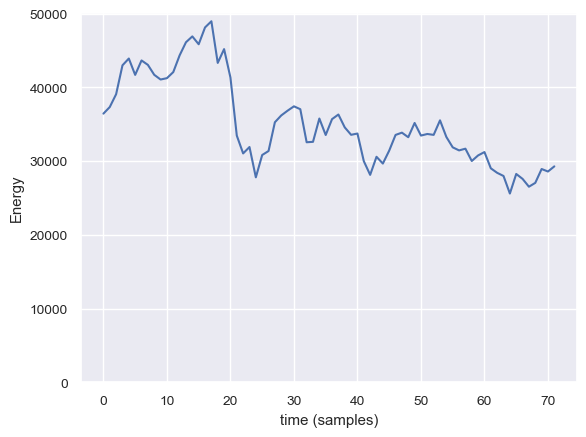

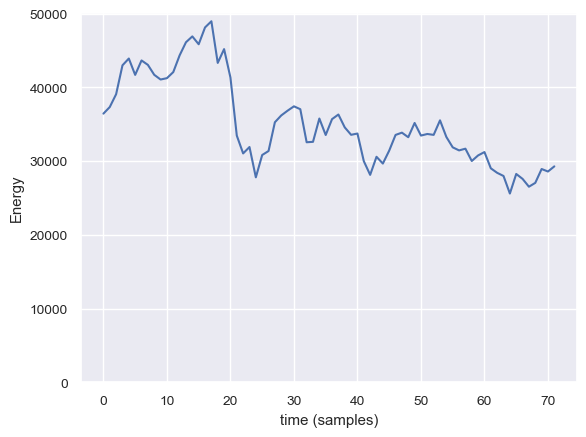

In [33]:
path_to_file = "data\Mario2\ThumbAbduction_1.npy"
step = 10

signal = Signal(path_to_file=path_to_file)
signal.display(attr="energy", w=5)
signal.remove_transition(algorithm="mean")
signal.display(attr="energy", w=5)

# testing models

## xgboost

In [7]:
# testing initial model on this new data

# initialize dataset 
path_to_dataset = "data"          

gr = GestureRecognitionDataset(path_to_dataset=path_to_dataset,             ## what is different in v1? Got no gestures in v2
                                    version="v1", save_df=False, 
                                    remove_transition=True)

df = gr.get_features()



  0%|          | 0/2102 [00:00<?, ?it/s]

  2%|▏         | 39/2102 [00:01<01:20, 25.69it/s]


KeyboardInterrupt: 

In [27]:
subject = 'Sergio'
Take_to_test = '1'

df = df[(df['subject'] == subject)]

In [28]:
#selecting X (features) and Y (gestures) 
# instantiate the model 

model_type = "xgboost"
#kernel = "rbf"
model = GestureRecognitionModel(model_name=model_type)

selected_columns = [ 'mav_0', 'mav_1', 'mav_2', 'mav_3', 'mav_4', 'mav_5', 'mav_6', 'mav_7',
       'rms_0', 'rms_1', 'rms_2', 'rms_3', 'rms_4', 'rms_5', 'rms_6', 'rms_7',
       'ssc_0', 'ssc_1', 'ssc_2', 'ssc_3', 'ssc_4', 'ssc_5', 'ssc_6', 'ssc_7',
       'wl_0', 'wl_1', 'wl_2', 'wl_3', 'wl_4', 'wl_5', 'wl_6', 'wl_7', 'var_0',
       'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6', 'var_7', 'iasd_0',
       'iasd_1', 'iasd_2', 'iasd_3', 'iasd_4', 'iasd_5', 'iasd_6', 'iasd_7',
       'iatd_0', 'iatd_1', 'iatd_2', 'iatd_3', 'iatd_4', 'iatd_5', 'iatd_6',
       'iatd_7']

# here I tested if the length of the features had any influence on the accuracy, this was not the case, so this can be skipped. 
# Find the length of the shortest column
#min_length = min(len(df[column]) for column in columns_x)

# Truncate each column to the length of the shortest column
#columns_x = [column[:min_length] for column in columns_x]

df_train = df[(df['take'] != Take_to_test)]
df_test = df[(df['take'] == Take_to_test)]

# Downsampling the "neutral" class in the training set
#neutral_df = df_train[df_train['gesture'] == 'Neutral']
#non_neutral_df = df_train[df_train['gesture'] != 'Neutral']

# Randomly sample 1/3 of the "neutral" class instances
#neutral_downsampled = neutral_df.sample(frac=1/3)

# Concatenate the downsampled neutral class with the rest of the training data
#df_train = pd.concat([non_neutral_df, neutral_downsampled])

X_train = df_train[selected_columns]
y_train = df_train['gesture']
X_test = df_test[selected_columns]
y_test = df_test['gesture']

'''
if kernel == 'linear' or kernel == 'sigmoid':
       scaler = StandardScaler() 
       X_train = scaler.fit_transform(X_train)
       X_test = scaler.transform(X_test)
else: 
       X_train = X_train
       X_test = X_test
'''

# encoding y to specify classes as numbers
label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(y_train)
y_train = Y_encoded 

Y_encoded2 = label_encoder.fit_transform(y_test)
y_test = Y_encoded2 

# training model
model.train(X_train, y_train)

# making predictions with the testing subset
y_pred = model.predict(X_test)

# decoding y 
predictions = [round(value) for value in y_pred]
predicted_labels_decoded = label_encoder.inverse_transform(predictions)

# calculate and print accuracy
accuracy = accuracy_score(y_test, predictions)*100

print("The accuracy of the model is %.2f%%" % ( accuracy))

The accuracy of the model is 56.36%


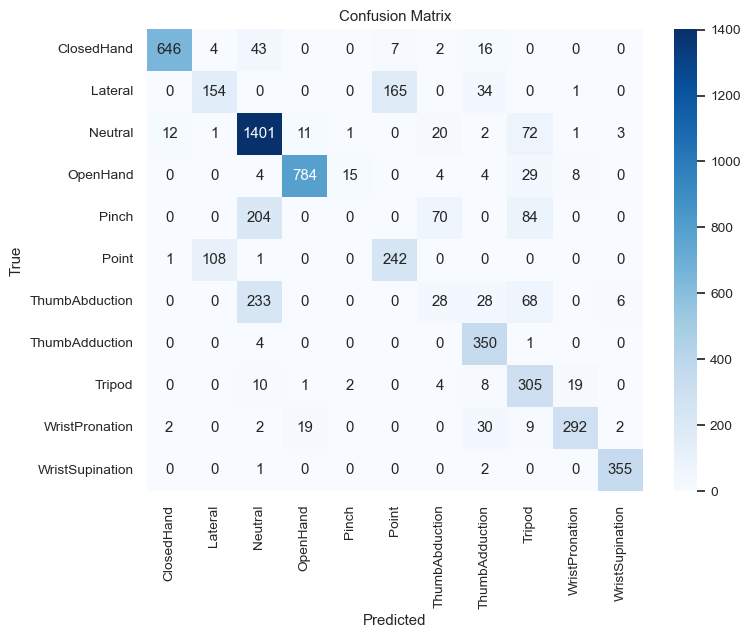

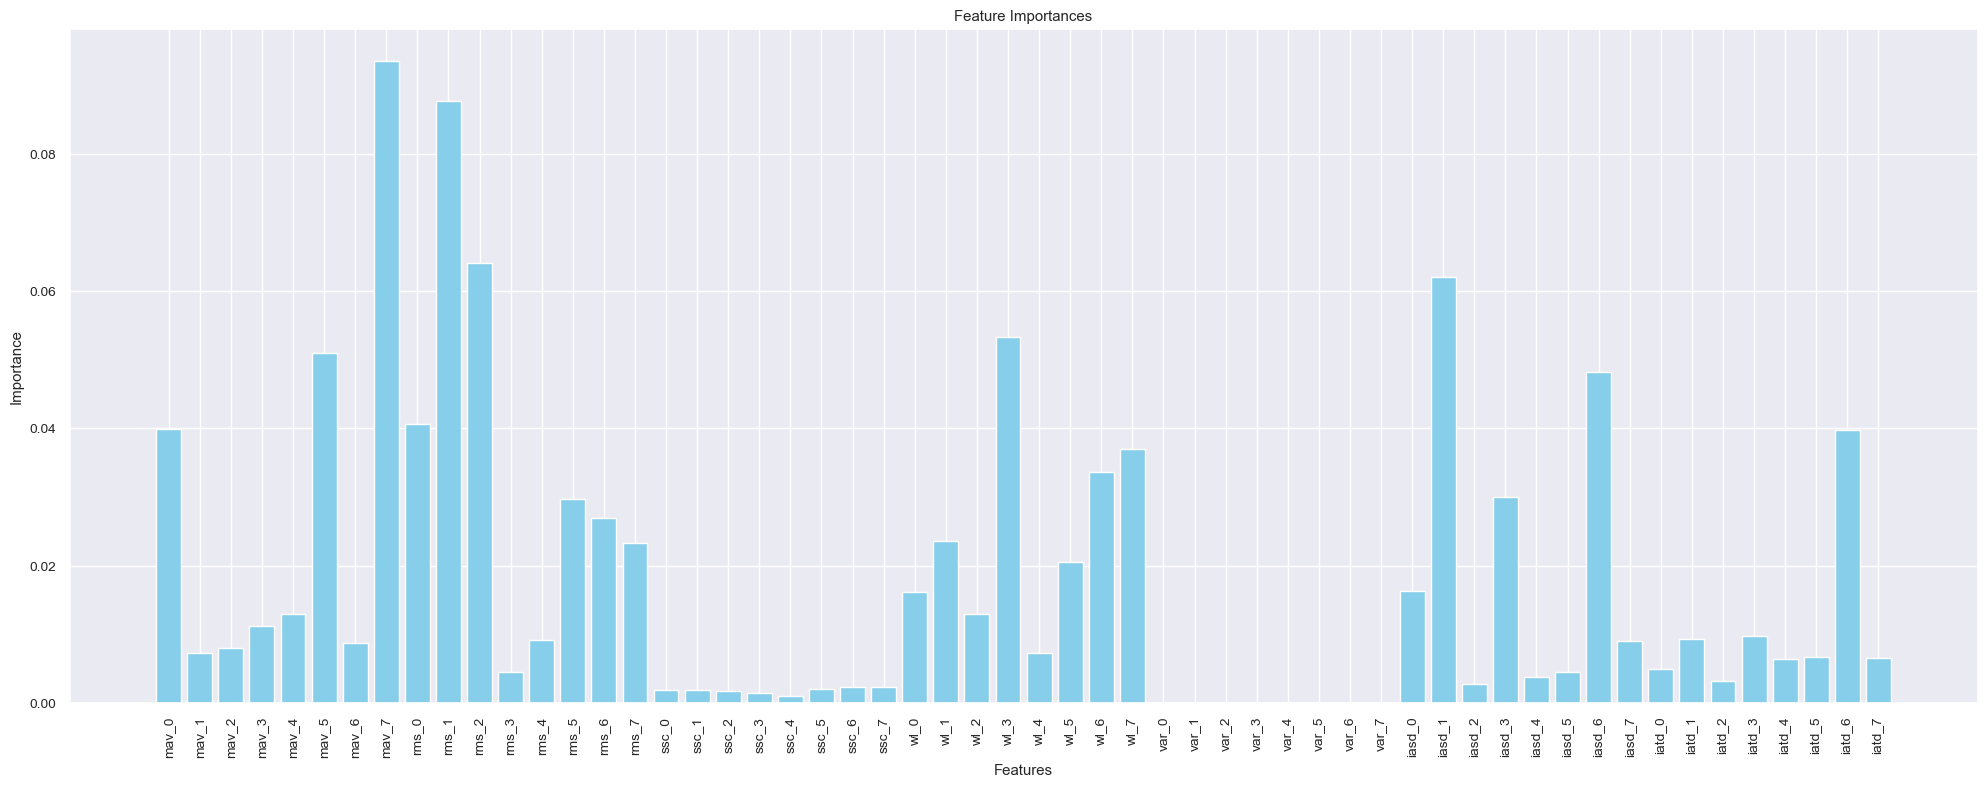

In [89]:
# plotting confusion matrix
# Calculate confusion matrix
cm = confusion_matrix(y_test, predictions)

# Get class labels
class_labels = label_encoder.classes_

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=0.9)  # Adjust to fit labels
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

feature_importances = model.model.feature_importances_
features = ['mav_0', 'mav_1', 'mav_2', 'mav_3', 'mav_4', 'mav_5', 'mav_6', 'mav_7',
       'rms_0', 'rms_1', 'rms_2', 'rms_3', 'rms_4', 'rms_5', 'rms_6', 'rms_7',
       'ssc_0', 'ssc_1', 'ssc_2', 'ssc_3', 'ssc_4', 'ssc_5', 'ssc_6', 'ssc_7',
       'wl_0', 'wl_1', 'wl_2', 'wl_3', 'wl_4', 'wl_5', 'wl_6', 'wl_7', 'var_0',
       'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6', 'var_7', 'iasd_0',
       'iasd_1', 'iasd_2', 'iasd_3', 'iasd_4', 'iasd_5', 'iasd_6', 'iasd_7',
       'iatd_0', 'iatd_1', 'iatd_2', 'iatd_3', 'iatd_4', 'iatd_5', 'iatd_6',
       'iatd_7']


plt.figure(figsize=(20, 8))
plt.bar(features, feature_importances, color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.title('Feature Importances')
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()

In [57]:
# testing treating of class imbalance

#selecting X (features) and Y (gestures) 

selected_columns = [ 'mav_0', 'mav_1', 'mav_2', 'mav_3', 'mav_4', 'mav_5', 'mav_6', 'mav_7',
       'rms_0', 'rms_1', 'rms_2', 'rms_3', 'rms_4', 'rms_5', 'rms_6', 'rms_7',
       'ssc_0', 'ssc_1', 'ssc_2', 'ssc_3', 'ssc_4', 'ssc_5', 'ssc_6', 'ssc_7',
       'wl_0', 'wl_1', 'wl_2', 'wl_3', 'wl_4', 'wl_5', 'wl_6', 'wl_7', 'var_0',
       'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6', 'var_7', 'iasd_0',
       'iasd_1', 'iasd_2', 'iasd_3', 'iasd_4', 'iasd_5', 'iasd_6', 'iasd_7',
       'iatd_0', 'iatd_1', 'iatd_2', 'iatd_3', 'iatd_4', 'iatd_5', 'iatd_6',
       'iatd_7']

# here I tested if the length of the features had any influence on the accuracy, this was not the case, so this can be skipped. 
# Find the length of the shortest column
#min_length = min(len(df[column]) for column in columns_x)

# Truncate each column to the length of the shortest column
#columns_x = [column[:min_length] for column in columns_x]

df_train = df[(df['take'] != Take_to_test)]
df_test = df[(df['take'] == Take_to_test)]

# Downsampling the "neutral" class in the training set
neutral_df = df_train[df_train['gesture'] == 'Neutral']
non_neutral_df = df_train[df_train['gesture'] != 'Neutral']

# Randomly sample 1/3 of the "neutral" class instances
neutral_downsampled = neutral_df.sample(frac=1/3)

# Concatenate the downsampled neutral class with the rest of the training data
df_train = pd.concat([non_neutral_df, neutral_downsampled])

X_train = df_train[selected_columns]
y_train = df_train['gesture']
X_test = df_test[selected_columns]
y_test = df_test['gesture']

if kernel == 'linear' or kernel == 'sigmoid':
       scaler = StandardScaler() 
       X_train = scaler.fit_transform(X_train)
       X_test = scaler.transform(X_test)
else: 
       X_train = X_train
       X_test = X_test

# encoding y to specify classes as numbers
label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(y_train)
y_train = Y_encoded 

Y_encoded2 = label_encoder.fit_transform(y_test)
y_test = Y_encoded2 

# training model
model.train(X_train, y_train)

# making predictions with the testing subset
y_pred = model.predict(X_test)

# decoding y 
predictions = [round(value) for value in y_pred]
predicted_labels_decoded = label_encoder.inverse_transform(predictions)

# calculate and print accuracy
accuracy = accuracy_score(y_test, predictions)*100

print("The accuracy of the model is %.2f%%" % ( accuracy))


The accuracy of the model is 83.05%


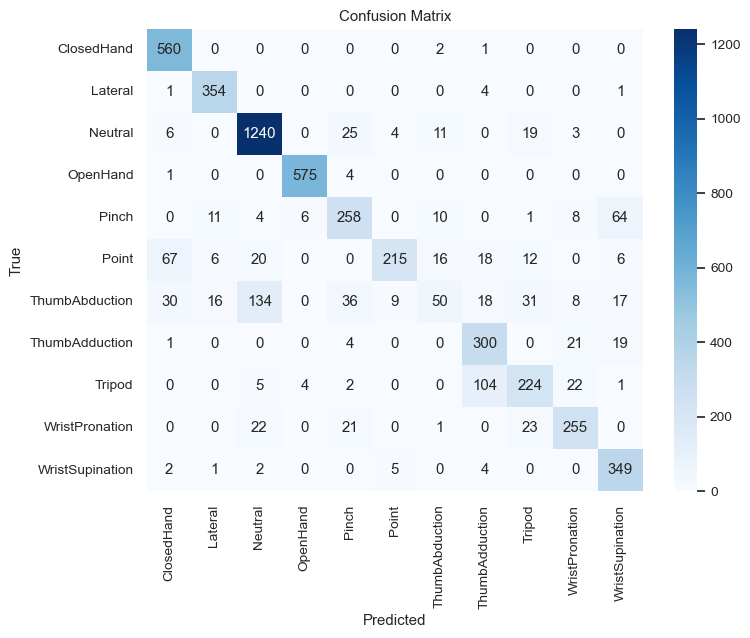

AttributeError: 'SVC' object has no attribute 'feature_importances_'

In [58]:
# plotting confusion matrix
# Calculate confusion matrix
cm = confusion_matrix(y_test, predictions)

# Get class labels
class_labels = label_encoder.classes_

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=0.9)  # Adjust to fit labels
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

feature_importances = model.model.feature_importances_
features = ['mav_0', 'mav_1', 'mav_2', 'mav_3', 'mav_4', 'mav_5', 'mav_6', 'mav_7',
       'rms_0', 'rms_1', 'rms_2', 'rms_3', 'rms_4', 'rms_5', 'rms_6', 'rms_7',
       'ssc_0', 'ssc_1', 'ssc_2', 'ssc_3', 'ssc_4', 'ssc_5', 'ssc_6', 'ssc_7',
       'wl_0', 'wl_1', 'wl_2', 'wl_3', 'wl_4', 'wl_5', 'wl_6', 'wl_7', 'var_0',
       'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6', 'var_7', 'iasd_0',
       'iasd_1', 'iasd_2', 'iasd_3', 'iasd_4', 'iasd_5', 'iasd_6', 'iasd_7',
       'iatd_0', 'iatd_1', 'iatd_2', 'iatd_3', 'iatd_4', 'iatd_5', 'iatd_6',
       'iatd_7']


plt.figure(figsize=(20, 8))
plt.bar(features, feature_importances, color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.title('Feature Importances')
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()

## SVM

In [2]:
# testing initial model on this new data

# initialize dataset 
path_to_dataset = "data"          

gr = GestureRecognitionDataset(path_to_dataset=path_to_dataset,             ## what is different in v1? Got no gestures in v2
                                    version="v1", save_df=False, 
                                    remove_transition=True)

df = gr.get_features()

100%|██████████| 2102/2102 [04:14<00:00,  8.25it/s]


In [3]:
df.to_csv('df.csv', index=None)  # To avoid saving the index

In [4]:
df.head()

,mav_0,mav_1,mav_2,mav_3,mav_4,mav_5,mav_6,mav_7,rms_0,rms_1,...,iatd_2,iatd_3,iatd_4,iatd_5,iatd_6,iatd_7,gesture,subject,take,iteration
0,1.88,1.72,2.16,5.14,4.54,8.04,4.62,2.24,2.340940,2.097618,...,489.0,1471.0,1103.0,2066.0,1326.0,611.0,ClosedHand,Aarushi,1,0.0
1,2.12,1.84,2.10,4.94,4.58,11.10,5.40,3.02,2.828427,2.441311,...,463.0,1275.0,1263.0,2715.0,1496.0,741.0,ClosedHand,Aarushi,1,0.0
2,2.32,1.84,2.12,4.94,5.50,15.86,8.12,3.96,3.168596,2.433105,...,508.0,1378.0,1396.0,3662.0,2131.0,1015.0,ClosedHand,Aarushi,1,0.0
3,2.38,1.98,2.00,4.88,5.92,16.84,9.30,4.04,3.258834,2.565151,...,476.0,1359.0,1544.0,3959.0,2282.0,1062.0,ClosedHand,Aarushi,1,0.0
4,2.56,2.12,1.88,4.76,6.44,19.50,10.28,4.06,3.492850,2.698148,...,454.0,1344.0,1770.0,4398.0,2274.0,1018.0,ClosedHand,Aarushi,1,0.0


In [2]:
df = pd.read_csv('df.csv')

In [3]:
df.head()

,mav_0,mav_1,mav_2,mav_3,mav_4,mav_5,mav_6,mav_7,rms_0,rms_1,...,iatd_2,iatd_3,iatd_4,iatd_5,iatd_6,iatd_7,gesture,subject,take,iteration
0,1.88,1.72,2.16,5.14,4.54,8.04,4.62,2.24,2.340940,2.097618,...,489.0,1471.0,1103.0,2066.0,1326.0,611.0,ClosedHand,Aarushi,1,0.0
1,2.12,1.84,2.10,4.94,4.58,11.10,5.40,3.02,2.828427,2.441311,...,463.0,1275.0,1263.0,2715.0,1496.0,741.0,ClosedHand,Aarushi,1,0.0
2,2.32,1.84,2.12,4.94,5.50,15.86,8.12,3.96,3.168596,2.433105,...,508.0,1378.0,1396.0,3662.0,2131.0,1015.0,ClosedHand,Aarushi,1,0.0
3,2.38,1.98,2.00,4.88,5.92,16.84,9.30,4.04,3.258834,2.565151,...,476.0,1359.0,1544.0,3959.0,2282.0,1062.0,ClosedHand,Aarushi,1,0.0
4,2.56,2.12,1.88,4.76,6.44,19.50,10.28,4.06,3.492850,2.698148,...,454.0,1344.0,1770.0,4398.0,2274.0,1018.0,ClosedHand,Aarushi,1,0.0


In [9]:
subject = 'Aarushi'
Take_to_test = '3'

df2 = df[(df['subject'] == subject)]

In [84]:
# testing different parameters

model = SVC(kernel="rbf",degree = 2, C = 10)#, class_weight='balanced')

selected_columns = [ 'mav_0', 'mav_1', 'mav_2', 'mav_3', 'mav_4', 'mav_5', 'mav_6', 'mav_7',
       'rms_0', 'rms_1', 'rms_2', 'rms_3', 'rms_4', 'rms_5', 'rms_6', 'rms_7',
       'ssc_0', 'ssc_1', 'ssc_2', 'ssc_3', 'ssc_4', 'ssc_5', 'ssc_6', 'ssc_7',
       'wl_0', 'wl_1', 'wl_2', 'wl_3', 'wl_4', 'wl_5', 'wl_6', 'wl_7', 'var_0',
       'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6', 'var_7', 'iasd_0',
       'iasd_1', 'iasd_2', 'iasd_3', 'iasd_4', 'iasd_5', 'iasd_6', 'iasd_7',
       'iatd_0', 'iatd_1', 'iatd_2', 'iatd_3', 'iatd_4', 'iatd_5', 'iatd_6',
       'iatd_7']

# here I tested if the length of the features had any influence on the accuracy, this was not the case, so this can be skipped. 
# Find the length of the shortest column
#min_length = min(len(df[column]) for column in columns_x)

# Truncate each column to the length of the shortest column
#columns_x = [column[:min_length] for column in columns_x]

df_train = df2[(df2['take'] != Take_to_test)]
df_test = df2[(df2['take'] == Take_to_test)]

X_train = df_train[selected_columns]
y_train = df_train['gesture']
X_test = df_test[selected_columns]
y_test = df_test['gesture']

'''
if kernel == 'linear' or kernel == 'sigmoid':
       scaler = StandardScaler() 
       X_train = scaler.fit_transform(X_train)
       X_test = scaler.transform(X_test)
else: 
       X_train = X_train
       X_test = X_test
'''

# encoding y to specify classes as numbers
label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(y_train)
y_train = Y_encoded 

Y_encoded2 = label_encoder.fit_transform(y_test)
y_test = Y_encoded2 

# training model
model.fit(X_train, y_train)

# making predictions with the testing subset
y_pred = model.predict(X_test)

# decoding y 
predictions = [round(value) for value in y_pred]
predicted_labels_decoded = label_encoder.inverse_transform(predictions)

# calculate and print accuracy
accuracy = accuracy_score(y_test, predictions)*100

print("The accuracy of the model is %.2f%%" % ( accuracy))

The accuracy of the model is 75.96%


## beeswarm

In [22]:
# testing initial model on this new data

# initialize dataset 
path_to_dataset = "data"          

gr = GestureRecognitionDataset(path_to_dataset=path_to_dataset,             ## what is different in v1? Got no gestures in v2
                                    version="v1", save_df=False, 
                                    remove_transition=True)

df = gr.get_features()

100%|██████████| 2102/2102 [02:12<00:00, 15.92it/s]


In [30]:
# deleted corrected xgboost, no additional accuracy

models = {"xgboost_c1":XGBClassifier(),
          "poly_c1": SVC(kernel="poly",degree = 2, C = 1),
          "poly_c10": SVC(kernel="poly",degree = 2, C = 10),
          "rbf_c1": SVC(kernel="rbf",degree = 2, C = 1),
          "rbf_c10": SVC(kernel="rbf",degree = 2, C = 10),
          "poly_c1_corr": SVC(kernel="poly",degree = 2, C = 1, class_weight='balanced'),
          "poly_c10_corr": SVC(kernel="poly",degree = 2, C = 10, class_weight='balanced'),
          "rbf_c1_corr": SVC(kernel="rbf",degree = 2, C = 1, class_weight='balanced'),
          "rbf_c10_corr": SVC(kernel="rbf",degree = 2, C = 10, class_weight='balanced'),
          }  

selected_columns = [ 'mav_0', 'mav_1', 'mav_2', 'mav_3', 'mav_4', 'mav_5', 'mav_6', 'mav_7',
       'rms_0', 'rms_1', 'rms_2', 'rms_3', 'rms_4', 'rms_5', 'rms_6', 'rms_7',
       'ssc_0', 'ssc_1', 'ssc_2', 'ssc_3', 'ssc_4', 'ssc_5', 'ssc_6', 'ssc_7',
       'wl_0', 'wl_1', 'wl_2', 'wl_3', 'wl_4', 'wl_5', 'wl_6', 'wl_7', 'var_0',
       'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6', 'var_7', 'iasd_0',
       'iasd_1', 'iasd_2', 'iasd_3', 'iasd_4', 'iasd_5', 'iasd_6', 'iasd_7',
       'iatd_0', 'iatd_1', 'iatd_2', 'iatd_3', 'iatd_4', 'iatd_5', 'iatd_6',
       'iatd_7']


test_sets = [1, 2, 3]
subjects = list(df.subject.unique())
subjects.remove("Mario")
subjects.remove("Hanaa")

results = {model:[] for model in models}


for subject in tqdm(subjects):
    for model in models:
        for test_set in test_sets:

        
            df2 = df[(df['subject'] == subject)]

            df_train = df2[(df2['take'] != str(test_set))]
            df_test = df2[(df2['take'] == str(test_set))]

            print(df_train.shape,df_test.shape)

            X_train = df_train[selected_columns]
            y_train = df_train['gesture']
            X_test = df_test[selected_columns]
            y_test = df_test['gesture']

            label_encoder = LabelEncoder()
            Y_encoded = label_encoder.fit_transform(y_train)
            y_train = Y_encoded 

            Y_encoded2 = label_encoder.fit_transform(y_test)
            y_test = Y_encoded2 

            # training model
            models[model].fit(X_train, y_train)

            # making predictions with the testing subset
            y_pred = models[model].predict(X_test)

            # decoding y 
            predictions = [round(value) for value in y_pred]
            predicted_labels_decoded = label_encoder.inverse_transform(predictions)

            # calculate and print accuracy
            acc = accuracy_score(y_test, predictions)*100
            
            results[model].append(acc)

results = pd.DataFrame(results)


  0%|          | 0/9 [00:00<?, ?it/s]

(11432, 60) (4597, 60)
(10532, 60) (5497, 60)
(10094, 60) (5935, 60)
(11432, 60) (4597, 60)
(10532, 60) (5497, 60)
(10094, 60) (5935, 60)
(11432, 60) (4597, 60)
(10532, 60) (5497, 60)
(10094, 60) (5935, 60)
(11432, 60) (4597, 60)
(10532, 60) (5497, 60)
(10094, 60) (5935, 60)
(11432, 60) (4597, 60)
(10532, 60) (5497, 60)
(10094, 60) (5935, 60)
(11432, 60) (4597, 60)
(10532, 60) (5497, 60)
(10094, 60) (5935, 60)
(11432, 60) (4597, 60)
(10532, 60) (5497, 60)
(10094, 60) (5935, 60)
(11432, 60) (4597, 60)
(10532, 60) (5497, 60)
(10094, 60) (5935, 60)
(11432, 60) (4597, 60)
(10532, 60) (5497, 60)
(10094, 60) (5935, 60)
(9122, 60) (4551, 60)
(9101, 60) (4572, 60)
(9123, 60) (4550, 60)
(9122, 60) (4551, 60)
(9101, 60) (4572, 60)
(9123, 60) (4550, 60)
(9122, 60) (4551, 60)
(9101, 60) (4572, 60)
(9123, 60) (4550, 60)
(9122, 60) (4551, 60)
(9101, 60) (4572, 60)
(9123, 60) (4550, 60)
(9122, 60) (4551, 60)
(9101, 60) (4572, 60)
(9123, 60) (4550, 60)
(9122, 60) (4551, 60)
(9101, 60) (4572, 60)
(9123

[Text(0, 0, 'xgboost_c1'),
 Text(1, 0, 'poly_c1'),
 Text(2, 0, 'poly_c10'),
 Text(3, 0, 'rbf_c1'),
 Text(4, 0, 'rbf_c10'),
 Text(5, 0, 'poly_c1_corr'),
 Text(6, 0, 'poly_c10_corr'),
 Text(7, 0, 'rbf_c1_corr'),
 Text(8, 0, 'rbf_c10_corr')]

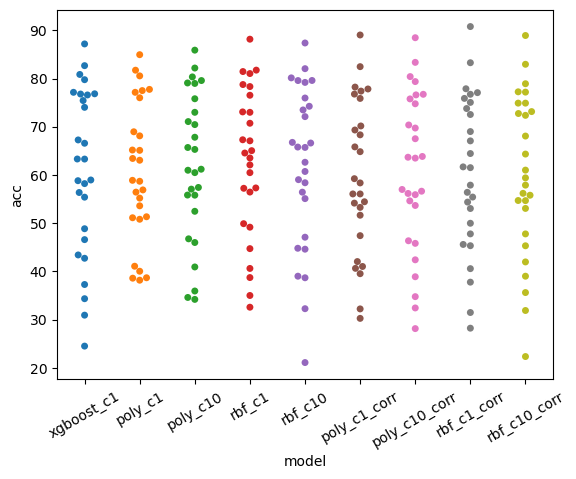

In [58]:
resultsplot = pd.DataFrame(results)
resultsplot = resultsplot.stack().reset_index()
resultsplot = resultsplot.rename(columns = {"level_1":"model", 0:"acc"})


ax = sns.swarmplot(data = resultsplot, x= "model", y = "acc" )
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

## MLP

In [ ]:
# ensemble model
# pretrained model?
# MLP on one persons data and train it on everyone else? way too depended on data.
- accuracies > 50 gebruiken
eerst verschillende parameters voor MLP gebruiken, komt het in de buurt?
Daarna spelen met parameters finetunen

In [2]:
# testing initial model on this new data

# initialize dataset 
path_to_dataset = "data"          

gr = GestureRecognitionDataset(path_to_dataset=path_to_dataset,             ## what is different in v1? Got no gestures in v2
                                    version="v1", save_df=False, 
                                    remove_transition=True)

df = gr.get_features()


100%|██████████| 2102/2102 [02:29<00:00, 14.03it/s]


In [4]:
subjects = list(df.subject.unique())
subjects.remove("Mario")
subjects.remove("Hanaa")
subjects.remove("Alex")
subjects.remove("David")
subjects.remove("Francisco")

df2 = df[df['subject'].isin(subjects)]
df2.head()

,mav_0,mav_1,mav_2,mav_3,mav_4,mav_5,mav_6,mav_7,rms_0,rms_1,...,iatd_2,iatd_3,iatd_4,iatd_5,iatd_6,iatd_7,gesture,subject,take,iteration
0,1.88,1.72,2.16,5.14,4.54,8.04,4.62,2.24,2.340940,2.097618,...,489.0,1471.0,1103.0,2066.0,1326.0,611.0,ClosedHand,Aarushi,1,0.0
1,2.12,1.84,2.10,4.94,4.58,11.10,5.40,3.02,2.828427,2.441311,...,463.0,1275.0,1263.0,2715.0,1496.0,741.0,ClosedHand,Aarushi,1,0.0
2,2.32,1.84,2.12,4.94,5.50,15.86,8.12,3.96,3.168596,2.433105,...,508.0,1378.0,1396.0,3662.0,2131.0,1015.0,ClosedHand,Aarushi,1,0.0
3,2.38,1.98,2.00,4.88,5.92,16.84,9.30,4.04,3.258834,2.565151,...,476.0,1359.0,1544.0,3959.0,2282.0,1062.0,ClosedHand,Aarushi,1,0.0
4,2.56,2.12,1.88,4.76,6.44,19.50,10.28,4.06,3.492850,2.698148,...,454.0,1344.0,1770.0,4398.0,2274.0,1018.0,ClosedHand,Aarushi,1,0.0


In [5]:
person_test = "Sergio"
df_train = df[(df['subject'] != person_test)]
df_test = df[(df['subject'] == person_test)] 

In [6]:
'''
df2 = df[(df['subject'] == person_test)]
Take_to_test = '1'
df_train = df2[(df2['take'] != Take_to_test)]
df_test = df2[(df2['take'] == Take_to_test)]
'''
df_test.shape

(16311, 60)

In [14]:
model = MLPClassifier(random_state=1,hidden_layer_sizes =50,max_iter=500)

selected_columns = [ 'mav_0', 'mav_1', 'mav_2', 'mav_3', 'mav_4', 'mav_5', 'mav_6', 'mav_7',
       'rms_0', 'rms_1', 'rms_2', 'rms_3', 'rms_4', 'rms_5', 'rms_6', 'rms_7',
       'ssc_0', 'ssc_1', 'ssc_2', 'ssc_3', 'ssc_4', 'ssc_5', 'ssc_6', 'ssc_7',
       'wl_0', 'wl_1', 'wl_2', 'wl_3', 'wl_4', 'wl_5', 'wl_6', 'wl_7', 'var_0',
       'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6', 'var_7', 'iasd_0',
       'iasd_1', 'iasd_2', 'iasd_3', 'iasd_4', 'iasd_5', 'iasd_6', 'iasd_7',
       'iatd_0', 'iatd_1', 'iatd_2', 'iatd_3', 'iatd_4', 'iatd_5', 'iatd_6',
       'iatd_7']

X_train = df_train[selected_columns]
y_train = df_train['gesture']
X_test = df_test[selected_columns]
y_test = df_test['gesture']

# encoding y to specify classes as numbers
label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(y_train)
y_train = Y_encoded 

Y_encoded2 = label_encoder.fit_transform(y_test)
y_test = Y_encoded2 

# training model
model.fit(X_train, y_train)

# making predictions with the testing subset
y_pred = model.predict(X_test)

# decoding y 
predictions = [round(value) for value in y_pred]
predicted_labels_decoded = label_encoder.inverse_transform(predictions)

# calculate and print accuracy
accuracy = accuracy_score(y_test, predictions)*100

print("The accuracy of the model is %.2f%%" % ( accuracy))

The accuracy of the model is 44.93%


In [15]:
model2 = model
df2 = df[(df['subject'] == person_test)] 

selected_columns = [ 'mav_0', 'mav_1', 'mav_2', 'mav_3', 'mav_4', 'mav_5', 'mav_6', 'mav_7',
       'rms_0', 'rms_1', 'rms_2', 'rms_3', 'rms_4', 'rms_5', 'rms_6', 'rms_7',
       'ssc_0', 'ssc_1', 'ssc_2', 'ssc_3', 'ssc_4', 'ssc_5', 'ssc_6', 'ssc_7',
       'wl_0', 'wl_1', 'wl_2', 'wl_3', 'wl_4', 'wl_5', 'wl_6', 'wl_7', 'var_0',
       'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6', 'var_7', 'iasd_0',
       'iasd_1', 'iasd_2', 'iasd_3', 'iasd_4', 'iasd_5', 'iasd_6', 'iasd_7',
       'iatd_0', 'iatd_1', 'iatd_2', 'iatd_3', 'iatd_4', 'iatd_5', 'iatd_6',
       'iatd_7']

Take_to_train = '1'
df_train = df2[(df2['take'] == Take_to_train)]
df_test = df2[(df2['take'] != Take_to_train)]

X_train2 = df_train[selected_columns]
y_train2 = df_train['gesture']
X_test2 = df_test[selected_columns]
y_test2 = df_test['gesture']

# encoding y to specify classes as numbers
label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(y_train2)
y_train2 = Y_encoded 

Y_encoded2 = label_encoder.fit_transform(y_test2)
y_test2 = Y_encoded2 

model2.partial_fit(X_train2, y_train2, classes=np.unique(y_train2))

# making predictions with the testing subset
y_pred = model2.predict(X_test2)

# decoding y 
predictions = [round(value) for value in y_pred]
predicted_labels_decoded = label_encoder.inverse_transform(predictions)

# calculate and print accuracy
accuracy = accuracy_score(y_test2, predictions)*100

print("The accuracy of the model is %.2f%%" % ( accuracy))

The accuracy of the model is 54.61%


## ensemble

In [2]:
# testing initial model on this new data

# initialize dataset 
path_to_dataset = "data"          

gr = GestureRecognitionDataset(path_to_dataset=path_to_dataset,             ## what is different in v1? Got no gestures in v2
                                    version="v1", save_df=False, 
                                    remove_transition=True)

df = gr.get_features()

100%|██████████| 2102/2102 [02:56<00:00, 11.90it/s]


In [27]:
subject = 'Sergio'
Take_to_test = '3'

df2 = df[(df['subject'] == subject)]

In [28]:
## ensemble models

clf1 = XGBClassifier()
clf2 = SVC(kernel="poly",degree = 2, C = 10)
clf3 = SVC(kernel="rbf", C = 10)
clf4 = SVC(kernel="poly",degree = 2, C = 10, class_weight='balanced')
clf5 = SVC(kernel="rbf", C = 10, class_weight='balanced')
clf6 = MLPClassifier(random_state=1,hidden_layer_sizes = 50,max_iter=500)
clf7 = RandomForestClassifier(random_state=1)

model = VotingClassifier(estimators=[('xgb', clf1), ('poly', clf2), ('rbf', clf3), ('polycorr', clf4), 
                                     ('rbfcorr', clf5), ('RF', clf7)], voting='hard')

selected_columns = [ 'mav_0', 'mav_1', 'mav_2', 'mav_3', 'mav_4', 'mav_5', 'mav_6', 'mav_7',
       'rms_0', 'rms_1', 'rms_2', 'rms_3', 'rms_4', 'rms_5', 'rms_6', 'rms_7',
       'ssc_0', 'ssc_1', 'ssc_2', 'ssc_3', 'ssc_4', 'ssc_5', 'ssc_6', 'ssc_7',
       'wl_0', 'wl_1', 'wl_2', 'wl_3', 'wl_4', 'wl_5', 'wl_6', 'wl_7', 'var_0',
       'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6', 'var_7', 'iasd_0',
       'iasd_1', 'iasd_2', 'iasd_3', 'iasd_4', 'iasd_5', 'iasd_6', 'iasd_7',
       'iatd_0', 'iatd_1', 'iatd_2', 'iatd_3', 'iatd_4', 'iatd_5', 'iatd_6',
       'iatd_7']


df_train = df2[(df2['take'] != Take_to_test)]
df_test = df2[(df2['take'] == Take_to_test)]

X_train = df_train[selected_columns]
y_train = df_train['gesture']
X_test = df_test[selected_columns]
y_test = df_test['gesture']

# encoding y to specify classes as numbers
label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(y_train)
y_train = Y_encoded 

Y_encoded2 = label_encoder.fit_transform(y_test)
y_test = Y_encoded2 

# training model
model.fit(X_train, y_train)

# making predictions with the testing subset
y_pred = model.predict(X_test)

# decoding y 
predictions = [round(value) for value in y_pred]
predicted_labels_decoded = label_encoder.inverse_transform(predictions)

# calculate and print accuracy
accuracy = accuracy_score(y_test, predictions)*100

print("The accuracy of the model is %.2f%%" % ( accuracy))

The accuracy of the model is 77.57%


## MLP averaging

In [4]:
# testing initial model on this new data

# initialize dataset 
path_to_dataset = "data"          

gr = GestureRecognitionDataset(path_to_dataset=path_to_dataset,             ## what is different in v1? Got no gestures in v2
                                    version="v1", save_df=False, 
                                    remove_transition=True)

df = gr.get_features()
df.to_csv('df.csv', index=None)  # To avoid saving the index

100%|██████████| 2102/2102 [02:53<00:00, 12.12it/s]


In [30]:
df = pd.read_csv('df.csv')

subjects = list(df.subject.unique())
subjects.remove("Mario")
subjects.remove("Hanaa")
subjects.remove("Alex")
subjects.remove("David")
subjects.remove("Francisco")

df = df[df['subject'].isin(subjects)]
subjects

['Aarushi', 'Ester', 'Imen', 'Lluis', 'Sergi', 'Sergio']

In [9]:
# 50 layer all combination for 5 subjects

test_sets = [1, 2, 3]
train_sets = [1, 2, 3]

subjects = list(df.subject.unique())

accuracy_matrix = np.zeros((len(subjects), 1, len(train_sets), len(test_sets), 2))
# Dimension breakdown:
# len(subjects) - Number of subjects
# 1 - Single value for accuracy_pre per subject
# len(train_sets) - Number of training sets
# len(test_sets) - Number of testing sets
# 2 - Accuracy_pre and Accuracy_post

for subject_idx, person_test in  tqdm(enumerate(subjects)):

    model = MLPClassifier(random_state=1,hidden_layer_sizes =50,max_iter=500)

    selected_columns = [ 'mav_0', 'mav_1', 'mav_2', 'mav_3', 'mav_4', 'mav_5', 'mav_6', 'mav_7',
    'rms_0', 'rms_1', 'rms_2', 'rms_3', 'rms_4', 'rms_5', 'rms_6', 'rms_7',
    'ssc_0', 'ssc_1', 'ssc_2', 'ssc_3', 'ssc_4', 'ssc_5', 'ssc_6', 'ssc_7',
    'wl_0', 'wl_1', 'wl_2', 'wl_3', 'wl_4', 'wl_5', 'wl_6', 'wl_7', 'var_0',
    'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6', 'var_7', 'iasd_0',
    'iasd_1', 'iasd_2', 'iasd_3', 'iasd_4', 'iasd_5', 'iasd_6', 'iasd_7',
    'iatd_0', 'iatd_1', 'iatd_2', 'iatd_3', 'iatd_4', 'iatd_5', 'iatd_6',
    'iatd_7']

    df_train = df[(df['subject'] != person_test)]
    df_test = df[(df['subject'] == person_test)]

    print(df_train.shape,df_test.shape)

    X_train = df_train[selected_columns]
    y_train = df_train['gesture']
    X_test = df_test[selected_columns]
    y_test = df_test['gesture']        

    # encoding y to specify classes as numbers
    label_encoder = LabelEncoder()
    Y_encoded = label_encoder.fit_transform(y_train)
    y_train = Y_encoded 

    Y_encoded2 = label_encoder.fit_transform(y_test)
    y_test = Y_encoded2 

    # training model
    model.fit(X_train, y_train)

    # making predictions with the testing subset
    y_pred = model.predict(X_test)

    # decoding y 
    predictions = [round(value) for value in y_pred]
    predicted_labels_decoded = label_encoder.inverse_transform(predictions)

    accuracy_pre = accuracy_score(y_test, predictions)*100
    accuracy_matrix[subject_idx, 0, 0, 0, 0] = accuracy_pre

    for train_idx, Take_to_train in enumerate(train_sets):
        for test_idx, Take_to_test in enumerate(test_sets):

            df2 = df[(df['subject'] == person_test)] 
            model2 = model

            df_train2 = df2[(df2['take'] == str(Take_to_train))]
            df_test2 = df2[(df2['take'] == str(Take_to_test))]
            
            print(df_train2.shape,df_test2.shape)

            X_train2 = df_train2[selected_columns]
            y_train2 = df_train2['gesture']
            X_test2 = df_test2[selected_columns]
            y_test2 = df_test2['gesture']

            # encoding y to specify classes as numbers
            label_encoder = LabelEncoder()
            Y_encoded = label_encoder.fit_transform(y_train2)
            y_train2 = Y_encoded 

            Y_encoded2 = label_encoder.fit_transform(y_test2)
            y_test2 = Y_encoded2 

            model2.partial_fit(X_train2, y_train2, classes=np.unique(y_train2))

            # making predictions with the testing subset
            y_pred = model2.predict(X_test2)

            # decoding y 
            predictions = [round(value) for value in y_pred]
            predicted_labels_decoded = label_encoder.inverse_transform(predictions)

            # calculate and print accuracy
            accuracy_post = accuracy_score(y_test2, predictions)*100

            accuracy_matrix[subject_idx, 0, train_idx, test_idx, 1] = accuracy_post


0it [00:00, ?it/s]

(72366, 60) (16029, 60)
(4597, 60) (4597, 60)
(4597, 60) (5497, 60)
(4597, 60) (5935, 60)
(5497, 60) (4597, 60)
(5497, 60) (5497, 60)
(5497, 60) (5935, 60)
(5935, 60) (4597, 60)
(5935, 60) (5497, 60)
(5935, 60) (5935, 60)
(74732, 60) (13663, 60)
(4478, 60) (4478, 60)
(4478, 60) (4620, 60)
(4478, 60) (4565, 60)
(4620, 60) (4478, 60)
(4620, 60) (4620, 60)
(4620, 60) (4565, 60)
(4565, 60) (4478, 60)
(4565, 60) (4620, 60)
(4565, 60) (4565, 60)
(74405, 60) (13990, 60)
(4688, 60) (4688, 60)
(4688, 60) (4628, 60)
(4688, 60) (4674, 60)
(4628, 60) (4688, 60)
(4628, 60) (4628, 60)
(4628, 60) (4674, 60)
(4674, 60) (4688, 60)
(4674, 60) (4628, 60)
(4674, 60) (4674, 60)
(73867, 60) (14528, 60)
(5274, 60) (5274, 60)
(5274, 60) (4619, 60)
(5274, 60) (4635, 60)
(4619, 60) (5274, 60)
(4619, 60) (4619, 60)
(4619, 60) (4635, 60)
(4635, 60) (5274, 60)
(4635, 60) (4619, 60)
(4635, 60) (4635, 60)
(74521, 60) (13874, 60)
(4666, 60) (4666, 60)
(4666, 60) (4626, 60)
(4666, 60) (4582, 60)
(4626, 60) (4666, 60)


In [15]:
np.save('accuracy_matrix.npy', accuracy_matrix)

[[[[[42.36695989 88.7317816 ]
    [ 0.         72.89430599]
    [ 0.         68.99747262]]

   [[ 0.         77.20252338]
    [ 0.         91.81371657]
    [ 0.         73.56360573]]

   [[ 0.         66.15183816]
    [ 0.         68.52828816]
    [ 0.         90.91828138]]]]



 [[[[21.56920149 68.98168825]
    [ 0.         52.16450216]
    [ 0.         52.42059146]]

   [[ 0.         56.5207682 ]
    [ 0.         70.67099567]
    [ 0.         52.44249726]]

   [[ 0.         60.04912908]
    [ 0.         59.52380952]
    [ 0.         72.1577218 ]]]]



 [[[[47.09792709 81.37798635]
    [ 0.         70.54883319]
    [ 0.         61.61745828]]

   [[ 0.         75.76791809]
    [ 0.         92.24286949]
    [ 0.         60.63329054]]

   [[ 0.         52.00511945]
    [ 0.         62.20829732]
    [ 0.         93.68848952]]]]



 [[[[56.594163   88.94577171]
    [ 0.         76.14202208]
    [ 0.         66.06256742]]

   [[ 0.         77.17102768]
    [ 0.         95.47521108]
    [ 0.

In [133]:
# Initialize a matrix to store the results
results_matrix = np.zeros((6, 2))

# Iterate over all sections
for i in range(6):
    # Select the current section
    sub = accuracy_matrix[i:i+1]
    Pretrained_acc = sub[0][0][0][0][0]
   
    # Remove the specified numbers
    sub[0, 0, 0, 0, 1] = 0  # Remove the first number of the first subsection
    sub[0, 0, 1, 1, 1] = 0  # Remove the second number of the second subsection
    sub[0, 0, 2, 2, 1] = 0  # Remove the third number of the third subsection

    # Selecting the numbers in the second "column"
    second_column = sub[0, 0, :, :, 1]
    non_zero_values = second_column[second_column != 0]
    average_non_zero = np.mean(non_zero_values)

    # Store Pretrained_acc and average_non_zero in the results matrix
    results_matrix[i, 0] = Pretrained_acc
    results_matrix[i, 1] = average_non_zero

print(results_matrix)
np.save('Average_accuracies',results_matrix)

[[42.36695989 71.22300567]
 [21.56920149 55.52021628]
 [47.09792709 63.79681948]
 [56.594163   75.54055428]
 [37.91985008 51.90336606]
 [44.07455092 56.11264142]]


In [31]:
# do the same for XGBoost
selected_columns = [ 'mav_0', 'mav_1', 'mav_2', 'mav_3', 'mav_4', 'mav_5', 'mav_6', 'mav_7',
       'rms_0', 'rms_1', 'rms_2', 'rms_3', 'rms_4', 'rms_5', 'rms_6', 'rms_7',
       'ssc_0', 'ssc_1', 'ssc_2', 'ssc_3', 'ssc_4', 'ssc_5', 'ssc_6', 'ssc_7',
       'wl_0', 'wl_1', 'wl_2', 'wl_3', 'wl_4', 'wl_5', 'wl_6', 'wl_7', 'var_0',
       'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6', 'var_7', 'iasd_0',
       'iasd_1', 'iasd_2', 'iasd_3', 'iasd_4', 'iasd_5', 'iasd_6', 'iasd_7',
       'iatd_0', 'iatd_1', 'iatd_2', 'iatd_3', 'iatd_4', 'iatd_5', 'iatd_6',
       'iatd_7']
            

train_sets = [1, 2, 3]

subjects = list(df.subject.unique())
xgboost_accuracies = [[0 for _ in range(len(train_sets))] for _ in range(len(subjects))]

for subject_idx, person_test in  tqdm(enumerate(subjects)):
    for train_idx, Take_to_test in enumerate(train_sets):
          
        df2 = df[(df['subject'] == person_test)]
        model = XGBClassifier()

        df_train = df2[(df2['take'] != Take_to_test)]
        df_test = df2[(df2['take'] == Take_to_test)]
     

        X_train = df_train[selected_columns]
        y_train = df_train['gesture']
        X_test = df_test[selected_columns]
        y_test = df_test['gesture']


        # encoding y to specify classes as numbers
        label_encoder = LabelEncoder()
        Y_encoded = label_encoder.fit_transform(y_train)
        y_train = Y_encoded 

        Y_encoded2 = label_encoder.fit_transform(y_test)
        y_test = Y_encoded2 

        # training model
        model.fit(X_train, y_train)

        # making predictions with the testing subset
        y_pred = model.predict(X_test)

        # decoding y 
        predictions = [round(value) for value in y_pred]
        predicted_labels_decoded = label_encoder.inverse_transform(predictions)

        # calculate and print accuracy
        accuracy = accuracy_score(y_test, predictions)*100
        xgboost_accuracies[subject_idx][train_idx] = accuracy

row_averages = np.mean(xgboost_accuracies, axis=1)

print("Average of each row:", row_averages)



0it [00:00, ?it/s]

In [32]:
np.save('Average_accuracies_xgboost',xgboost_accuracies)

[[76.83271698934088, 74.02219392395853, 76.78180286436394],
 [58.95489057615006, 55.38961038961039, 58.20372398685652],
 [66.57423208191126, 77.1391529818496, 63.3076593923834],
 [82.66970041714069, 79.75752327343581, 76.59115426105717],
 [58.80840120017146, 63.29442282749675, 48.843299869052814],
 [56.356413166855845, 67.26201107340597, 75.4330998894213]]

## Ensemble Kappa scores

The accuracy of the model is 80.29%


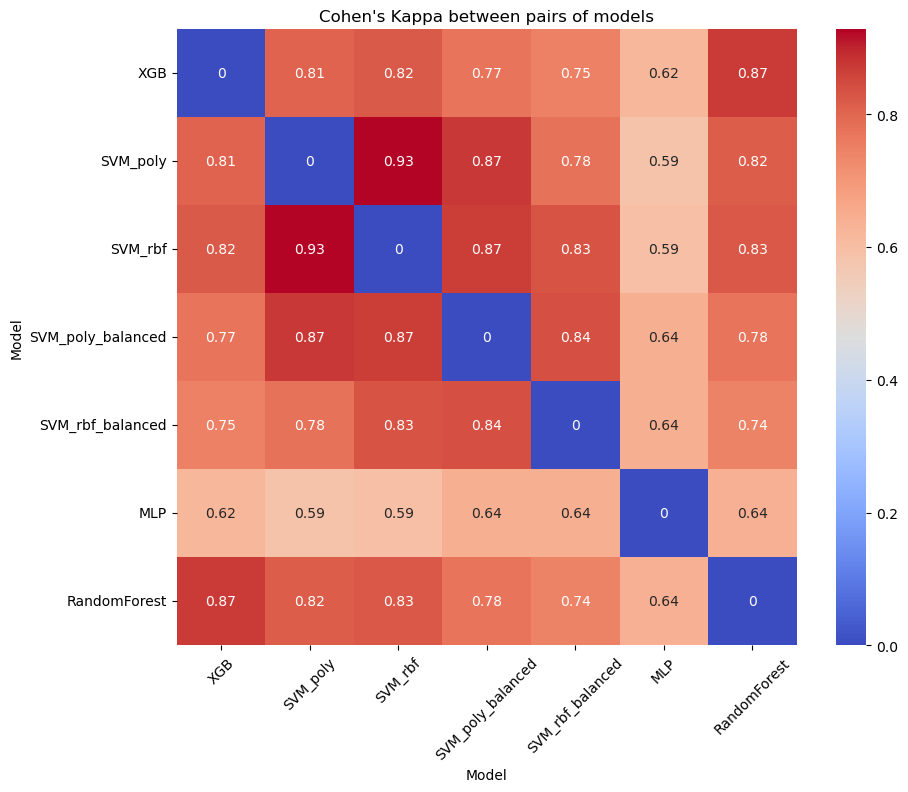

The accuracy of the model is 78.90%


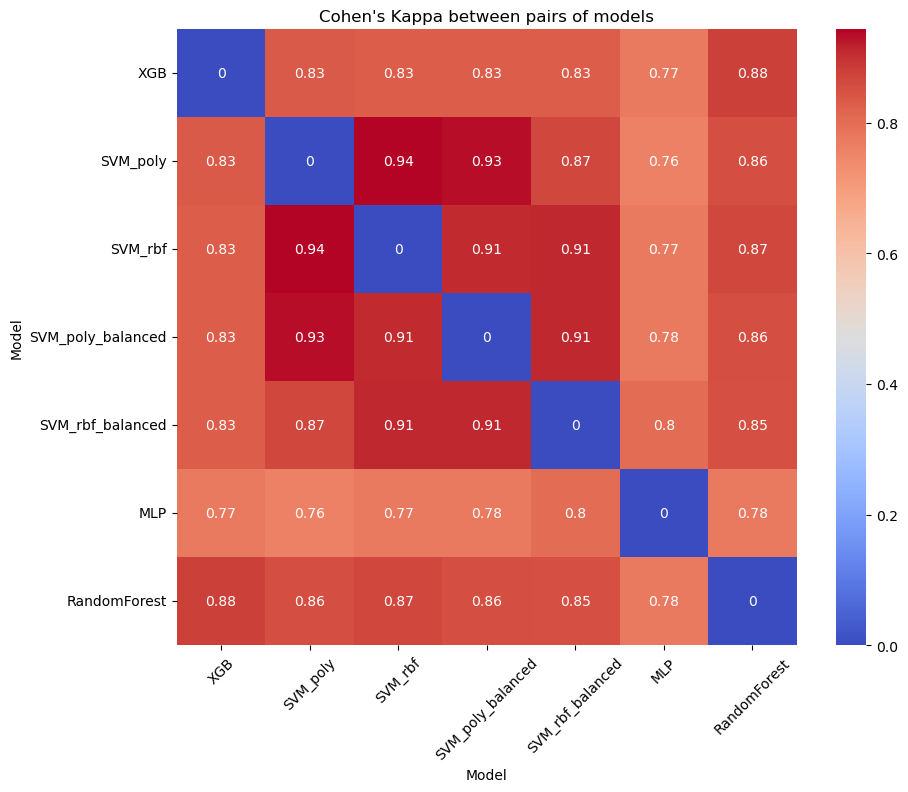

The accuracy of the model is 77.57%


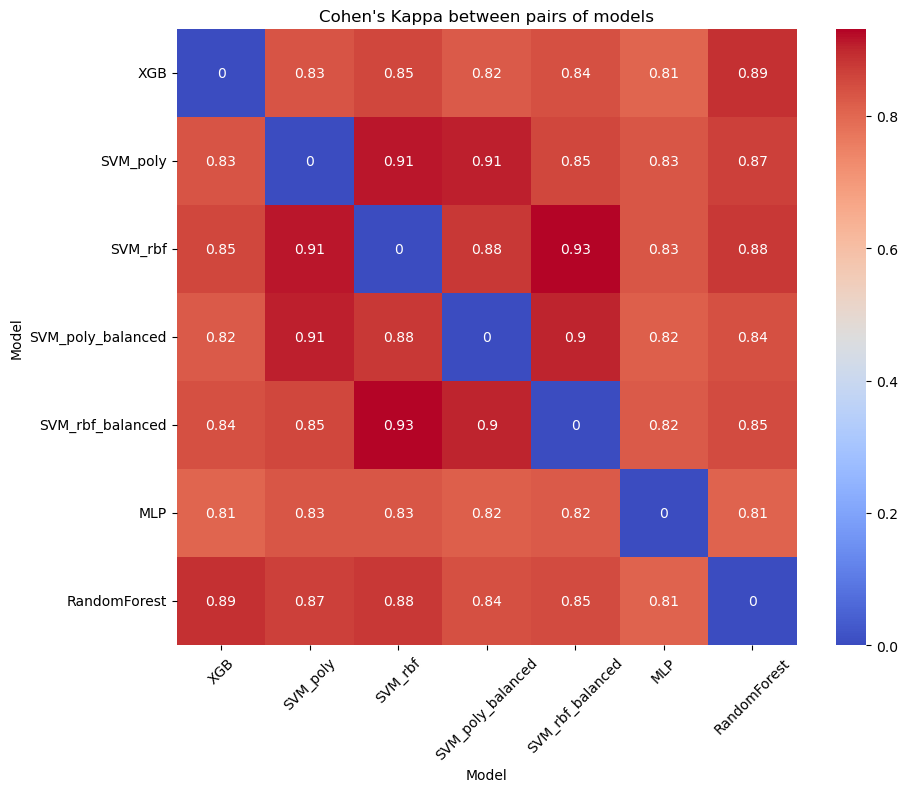

In [2]:
# ensemble with kappa scores
df = pd.read_csv('df.csv')
subject = 'Aarushi'
Take_to_test = 1

df2 = df[(df['subject'] == subject)]

train_sets = [1, 2, 3]

subjects = list(df.subject.unique())
xgboost_accuracies = [[0 for _ in range(len(train_sets))] for _ in range(len(subjects))]

for train_idx, Take_to_test in enumerate(train_sets):

    model = XGBClassifier()

    # Define classifiers
    clf1 = XGBClassifier()
    clf2 = SVC(kernel="poly", degree=2, C=10)
    clf3 = SVC(kernel="rbf", C=10)
    clf4 = SVC(kernel="poly", degree=2, C=10, class_weight='balanced')
    clf5 = SVC(kernel="rbf", C=10, class_weight='balanced')
    clf6 = MLPClassifier(random_state=1, hidden_layer_sizes=50, max_iter=500)
    clf7 = RandomForestClassifier(random_state=1)

    # Define the ensemble model
    model = VotingClassifier(estimators=[
        ('xgb', clf1), ('poly', clf2), ('rbf', clf3), ('polycorr', clf4),
        ('rbfcorr', clf5), ('RF', clf7)], voting='hard')

    # Define selected columns
    selected_columns = ['mav_0', 'mav_1', 'mav_2', 'mav_3', 'mav_4', 'mav_5', 'mav_6', 'mav_7',
                        'rms_0', 'rms_1', 'rms_2', 'rms_3', 'rms_4', 'rms_5', 'rms_6', 'rms_7',
                        'ssc_0', 'ssc_1', 'ssc_2', 'ssc_3', 'ssc_4', 'ssc_5', 'ssc_6', 'ssc_7',
                        'wl_0', 'wl_1', 'wl_2', 'wl_3', 'wl_4', 'wl_5', 'wl_6', 'wl_7', 'var_0',
                        'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6', 'var_7', 'iasd_0',
                        'iasd_1', 'iasd_2', 'iasd_3', 'iasd_4', 'iasd_5', 'iasd_6', 'iasd_7',
                        'iatd_0', 'iatd_1', 'iatd_2', 'iatd_3', 'iatd_4', 'iatd_5', 'iatd_6',
                        'iatd_7']

    # Split the data into train and test sets
    df_train = df2[(df2['take'] != Take_to_test)]
    df_test = df2[(df2['take'] == Take_to_test)]

    X_train = df_train[selected_columns]
    y_train = df_train['gesture']
    X_test = df_test[selected_columns]
    y_test = df_test['gesture']

    # Encoding y to specify classes as numbers
    label_encoder = LabelEncoder()
    Y_encoded = label_encoder.fit_transform(y_train)
    y_train = Y_encoded

    Y_encoded2 = label_encoder.fit_transform(y_test)
    y_test = Y_encoded2

    # Fitting the XGBoost classifier on the training data
    clf1.fit(X_train, y_train)

    # Fitting each remaining classifier on the training data
    for clf in [clf2, clf3, clf4, clf5, clf6, clf7]:
        clf.fit(X_train, y_train)

    # Training the ensemble model
    model.fit(X_train, y_train)

    # Making predictions with the testing subset
    y_pred = model.predict(X_test)

    # Decoding y
    predictions = [round(value) for value in y_pred]
    predicted_labels_decoded = label_encoder.inverse_transform(predictions)

    # Calculate and print accuracy
    accuracy = accuracy_score(y_test, predictions) * 100
    print("The accuracy of the model is %.2f%%" % accuracy)

    # Calculate and print Cohen's Kappa between pairs of models
    all_predictions = []
    for clf in [clf1, clf2, clf3, clf4, clf5, clf6, clf7]:
        y_pred = clf.predict(X_test)
        all_predictions.append(y_pred)

    # Define model names
    model_names = ['XGB', 'SVM_poly', 'SVM_rbf', 'SVM_poly_balanced', 'SVM_rbf_balanced', 'MLP', 'RandomForest']

    # Calculate Cohen's Kappa between pairs of models
    kappa_matrix = np.zeros((len(all_predictions), len(all_predictions)))
    for i in range(len(all_predictions)):
        for j in range(i + 1, len(all_predictions)):
            kappa = cohen_kappa_score(all_predictions[i], all_predictions[j])
            kappa_matrix[i, j] = kappa
            kappa_matrix[j, i] = kappa  # Since Cohen's Kappa is symmetric

    # Plotting the heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(kappa_matrix, annot=True, cmap='coolwarm', xticklabels=model_names, yticklabels=model_names)
    plt.title("Cohen's Kappa between pairs of models")
    plt.xlabel("Model")
    plt.ylabel("Model")
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.show()

In [17]:
kappa_matrix.shape
df = pd.read_csv('df.csv')

subjects = list(df.subject.unique())
subjects.remove("Mario")
subjects.remove("Hanaa")
subjects.remove("Alex")
subjects.remove("David")
subjects.remove("Francisco")

df = df[df['subject'].isin(subjects)]
subjects

['Aarushi', 'Ester', 'Imen', 'Lluis', 'Sergi', 'Sergio']

0it [00:00, ?it/s]

The accuracy of the model is 80.29%
The accuracy of the model is 78.90%
The accuracy of the model is 77.57%
The accuracy of the model is 59.02%
The accuracy of the model is 57.53%
The accuracy of the model is 62.43%
The accuracy of the model is 67.13%
The accuracy of the model is 76.58%
The accuracy of the model is 63.24%
The accuracy of the model is 83.52%
The accuracy of the model is 79.52%
The accuracy of the model is 74.54%
The accuracy of the model is 65.30%
The accuracy of the model is 67.64%
The accuracy of the model is 57.53%
The accuracy of the model is 56.45%
The accuracy of the model is 67.12%
The accuracy of the model is 73.83%


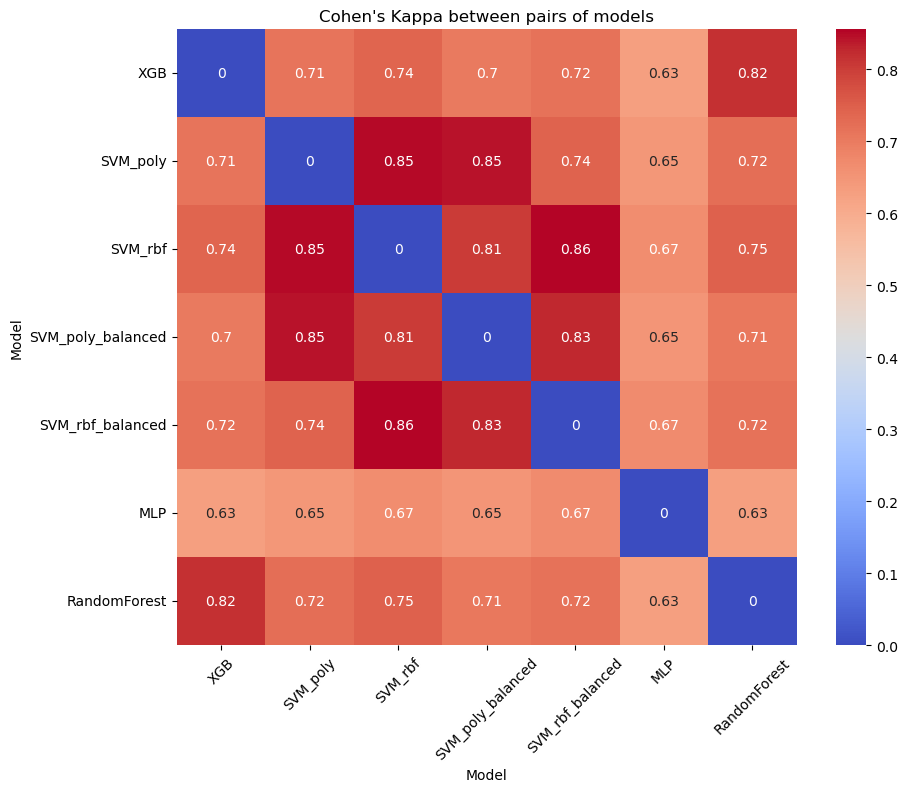

In [18]:
# ensemble with kappa scores
df = pd.read_csv('df.csv')

kappa_matrices = []
train_sets = [1, 2, 3]

xgboost_accuracies = [[0 for _ in range(len(train_sets))] for _ in range(len(subjects))]

for subject_idx, person_test in  tqdm(enumerate(subjects)):       
    for train_idx, Take_to_test in enumerate(train_sets):

        df2 = df[(df['subject'] == person_test)]
        model = XGBClassifier()

        # Define classifiers
        clf1 = XGBClassifier()
        clf2 = SVC(kernel="poly", degree=2, C=10)
        clf3 = SVC(kernel="rbf", C=10)
        clf4 = SVC(kernel="poly", degree=2, C=10, class_weight='balanced')
        clf5 = SVC(kernel="rbf", C=10, class_weight='balanced')
        clf6 = MLPClassifier(random_state=1, hidden_layer_sizes=50, max_iter=500)
        clf7 = RandomForestClassifier(random_state=1)

        # Define the ensemble model
        model = VotingClassifier(estimators=[
            ('xgb', clf1), ('poly', clf2), ('rbf', clf3), ('polycorr', clf4),
            ('rbfcorr', clf5), ('RF', clf7)], voting='hard')

        # Define selected columns
        selected_columns = ['mav_0', 'mav_1', 'mav_2', 'mav_3', 'mav_4', 'mav_5', 'mav_6', 'mav_7',
                            'rms_0', 'rms_1', 'rms_2', 'rms_3', 'rms_4', 'rms_5', 'rms_6', 'rms_7',
                            'ssc_0', 'ssc_1', 'ssc_2', 'ssc_3', 'ssc_4', 'ssc_5', 'ssc_6', 'ssc_7',
                            'wl_0', 'wl_1', 'wl_2', 'wl_3', 'wl_4', 'wl_5', 'wl_6', 'wl_7', 'var_0',
                            'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6', 'var_7', 'iasd_0',
                            'iasd_1', 'iasd_2', 'iasd_3', 'iasd_4', 'iasd_5', 'iasd_6', 'iasd_7',
                            'iatd_0', 'iatd_1', 'iatd_2', 'iatd_3', 'iatd_4', 'iatd_5', 'iatd_6',
                            'iatd_7']

        # Split the data into train and test sets
        df_train = df2[(df2['take'] != Take_to_test)]
        df_test = df2[(df2['take'] == Take_to_test)]

        X_train = df_train[selected_columns]
        y_train = df_train['gesture']
        X_test = df_test[selected_columns]
        y_test = df_test['gesture']

        # Encoding y to specify classes as numbers
        label_encoder = LabelEncoder()
        Y_encoded = label_encoder.fit_transform(y_train)
        y_train = Y_encoded

        Y_encoded2 = label_encoder.fit_transform(y_test)
        y_test = Y_encoded2

        # Fitting the XGBoost classifier on the training data
        clf1.fit(X_train, y_train)

        # Fitting each remaining classifier on the training data
        for clf in [clf2, clf3, clf4, clf5, clf6, clf7]:
            clf.fit(X_train, y_train)

        # Training the ensemble model
        model.fit(X_train, y_train)

        # Making predictions with the testing subset
        y_pred = model.predict(X_test)

        # Decoding y
        predictions = [round(value) for value in y_pred]
        predicted_labels_decoded = label_encoder.inverse_transform(predictions)

        # Calculate and print accuracy
        accuracy = accuracy_score(y_test, predictions) * 100
        print("The accuracy of the model is %.2f%%" % accuracy)

        # Calculate and print Cohen's Kappa between pairs of models
        all_predictions = []
        for clf in [clf1, clf2, clf3, clf4, clf5, clf6, clf7]:
            y_pred = clf.predict(X_test)
            all_predictions.append(y_pred)

        # Define model names
        model_names = ['XGB', 'SVM_poly', 'SVM_rbf', 'SVM_poly_balanced', 'SVM_rbf_balanced', 'MLP', 'RandomForest']

        # Calculate Cohen's Kappa between pairs of models
        kappa_matrix = np.zeros((len(all_predictions), len(all_predictions)))
        for i in range(len(all_predictions)):
            for j in range(i + 1, len(all_predictions)):
                kappa = cohen_kappa_score(all_predictions[i], all_predictions[j])
                kappa_matrix[i, j] = kappa
                kappa_matrix[j, i] = kappa  # Since Cohen's Kappa is symmetric

        # Append kappa matrix to the list
        kappa_matrices.append(kappa_matrix)

# Convert list of arrays to a single 3D array
kappa_matrices1 = np.array(kappa_matrices)

# Calculate the average along the first axis (axis 0)
average_matrix = np.mean(kappa_matrices1, axis=0)

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(average_matrix, annot=True, cmap='coolwarm', xticklabels=model_names, yticklabels=model_names)
plt.title("Cohen's Kappa between pairs of models")
plt.xlabel("Model")
plt.ylabel("Model")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

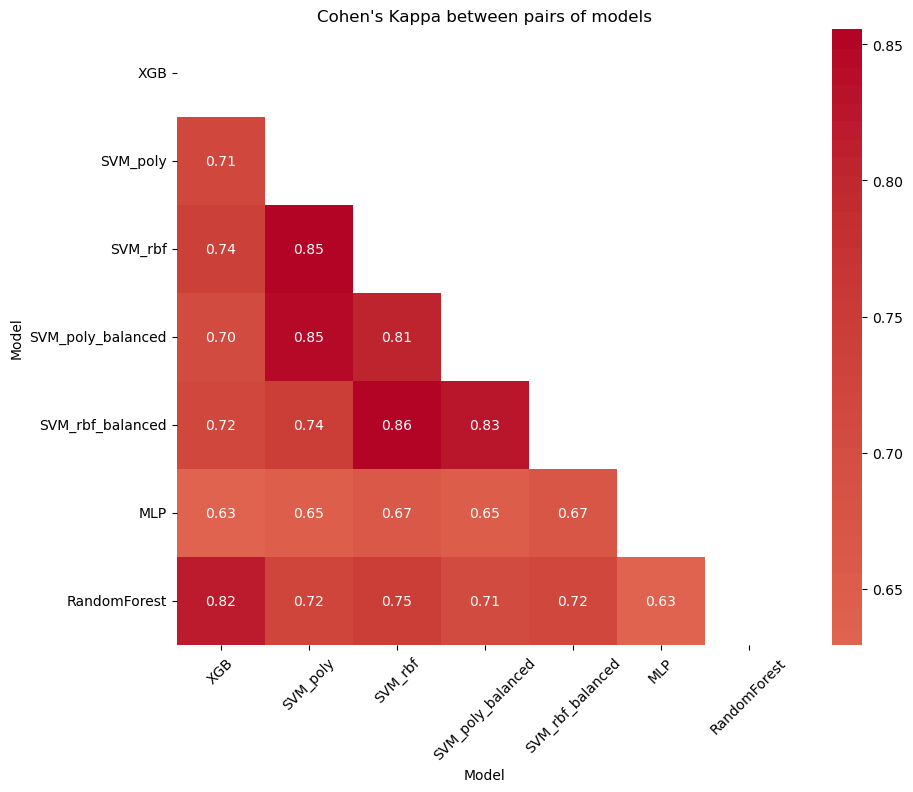

In [31]:
# Create a mask
mask = np.triu(np.ones_like(average_matrix, dtype=bool))

# Create a custom divergin palette
cmap = sns.diverging_palette(100, 7, s=75, l=40,
                            n=5, center="light", as_cmap=True)

plt.figure(figsize=(10,8))
sns.heatmap(average_matrix, mask=mask, center=0, annot=True,
            fmt='.2f', square=True,cmap='coolwarm', xticklabels=model_names, yticklabels=model_names)
plt.title("Cohen's Kappa between pairs of models")
plt.xlabel("Model")
plt.ylabel("Model")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()




In [15]:
# Convert list of arrays to a single 3D array
kappa_matrices1 = np.array(kappa_matrices)

# Calculate the average along the first axis (axis 0)
average_matrix = np.mean(kappa_matrices1, axis=0)

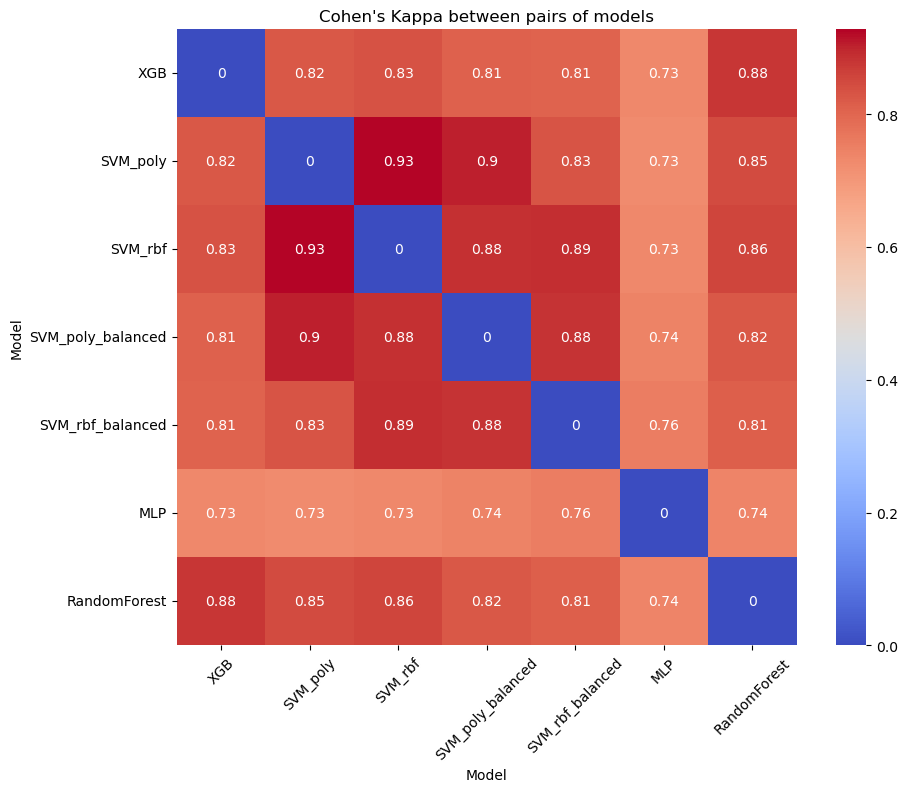

In [16]:
# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(average_matrix, annot=True, cmap='coolwarm', xticklabels=model_names, yticklabels=model_names)
plt.title("Cohen's Kappa between pairs of models")
plt.xlabel("Model")
plt.ylabel("Model")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

## test with and without transition removal

In [3]:
path_to_dataset = "data"          

data = GestureRecognitionDataset(path_to_dataset=path_to_dataset,           
                                    version="v1", save_df=False, 
                                    remove_transition=False)

data_rem = GestureRecognitionDataset(path_to_dataset=path_to_dataset,           
                                    version="v1", save_df=False, 
                                    remove_transition=True)

df = data.get_features()
df_rem = data_rem.get_features()

df.to_csv('data.csv', index=None)  # To avoid saving the index
df_rem.to_csv('data_rem.csv', index=None)  # To avoid saving the index


  0%|          | 0/2102 [00:00<?, ?it/s]

100%|██████████| 2102/2102 [02:20<00:00, 14.91it/s]


In [4]:
train_sets = [1, 2, 3]
subjects = list(df.subject.unique())
subjects.remove("Hanaa")
subjects.remove("Mario")

accuracy_matrix = np.zeros((len(subjects), len(train_sets), 2))

for subject_idx, person_test in  tqdm(enumerate(subjects)):       
    for train_idx, Take_to_test in enumerate(train_sets):
        

        df2 = df[(df['subject'] == person_test)]
        df2_rem = df_rem[(df_rem['subject'] == person_test)]
        
        model1 = XGBClassifier()
        model2 = XGBClassifier()

        # Define selected columns
        selected_columns = ['mav_0', 'mav_1', 'mav_2', 'mav_3', 'mav_4', 'mav_5', 'mav_6', 'mav_7',
                            'rms_0', 'rms_1', 'rms_2', 'rms_3', 'rms_4', 'rms_5', 'rms_6', 'rms_7',
                            'ssc_0', 'ssc_1', 'ssc_2', 'ssc_3', 'ssc_4', 'ssc_5', 'ssc_6', 'ssc_7',
                            'wl_0', 'wl_1', 'wl_2', 'wl_3', 'wl_4', 'wl_5', 'wl_6', 'wl_7', 'var_0',
                            'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6', 'var_7', 'iasd_0',
                            'iasd_1', 'iasd_2', 'iasd_3', 'iasd_4', 'iasd_5', 'iasd_6', 'iasd_7',
                            'iatd_0', 'iatd_1', 'iatd_2', 'iatd_3', 'iatd_4', 'iatd_5', 'iatd_6',
                            'iatd_7']

        # Split the data into train and test sets
        df_train = df2[(df2['take'] != str(Take_to_test))]
        df_test = df2[(df2['take'] == str(Take_to_test))]

        df_train_rem = df2_rem[(df2_rem['take'] != str(Take_to_test))]
        df_test_rem = df2_rem[(df2_rem['take'] == str(Take_to_test))]
    

        X_train = df_train[selected_columns]
        y_train = df_train['gesture']
        X_test = df_test[selected_columns]
        y_test = df_test['gesture']
        X_train_rem = df_train_rem[selected_columns]
        y_train_rem = df_train_rem['gesture']
        X_test_rem = df_test_rem[selected_columns]
        y_test_rem = df_test_rem['gesture']

        # Encoding y to specify classes as numbers
        label_encoder = LabelEncoder()
        Y_encoded = label_encoder.fit_transform(y_train)
        Y_encoded_rem = label_encoder.fit_transform(y_train_rem)
        y_train = Y_encoded
        y_train_rem = Y_encoded_rem

        Y_encoded2 = label_encoder.fit_transform(y_test)
        y_test = Y_encoded2
        Y_encoded2_rem = label_encoder.fit_transform(y_test_rem)
        y_test_rem = Y_encoded2_rem

        # Training the ensemble model
        model1.fit(X_train, y_train)
        model2.fit(X_train, y_train)

        # Making predictions with the testing subset
        y_pred = model1.predict(X_test)
        y_pred_rem = model2.predict(X_test_rem)

        # Decoding y
        predictions = [round(value) for value in y_pred]
        predicted_labels_decoded = label_encoder.inverse_transform(predictions)
        predictions_rem = [round(value) for value in y_pred_rem]
        predicted_labels_decoded_rem = label_encoder.inverse_transform(predictions_rem)

        # Calculate and print accuracy
        accuracy = accuracy_score(y_test, predictions) * 100
        accuracy_rem = accuracy_score(y_test_rem, predictions_rem) * 100
        print("The accuracy of the model is %.2f%%" % accuracy)
        print("The accuracy of the model with removal is %.2f%%" % accuracy_rem)

        # Store accuracies in the matrix
        accuracy_matrix[subject_idx, train_idx, 0] = accuracy
        accuracy_matrix[subject_idx, train_idx, 1] = accuracy_rem






0it [00:00, ?it/s]

The accuracy of the model is 74.19%
The accuracy of the model with removal is 75.61%
The accuracy of the model is 73.03%
The accuracy of the model with removal is 73.46%
The accuracy of the model is 76.51%
The accuracy of the model with removal is 77.93%
The accuracy of the model is 29.82%
The accuracy of the model with removal is 30.32%
The accuracy of the model is 22.09%
The accuracy of the model with removal is 22.59%
The accuracy of the model is 32.95%
The accuracy of the model with removal is 33.82%
The accuracy of the model is 82.24%
The accuracy of the model with removal is 82.98%
The accuracy of the model is 86.21%
The accuracy of the model with removal is 87.55%
The accuracy of the model is 40.59%
The accuracy of the model with removal is 41.25%
The accuracy of the model is 57.54%
The accuracy of the model with removal is 58.89%
The accuracy of the model is 55.23%
The accuracy of the model with removal is 55.91%
The accuracy of the model is 58.35%
The accuracy of the model wit

In [5]:
accuracy_matrix
np.save('accuracies with and without transition removal',accuracy_matrix)

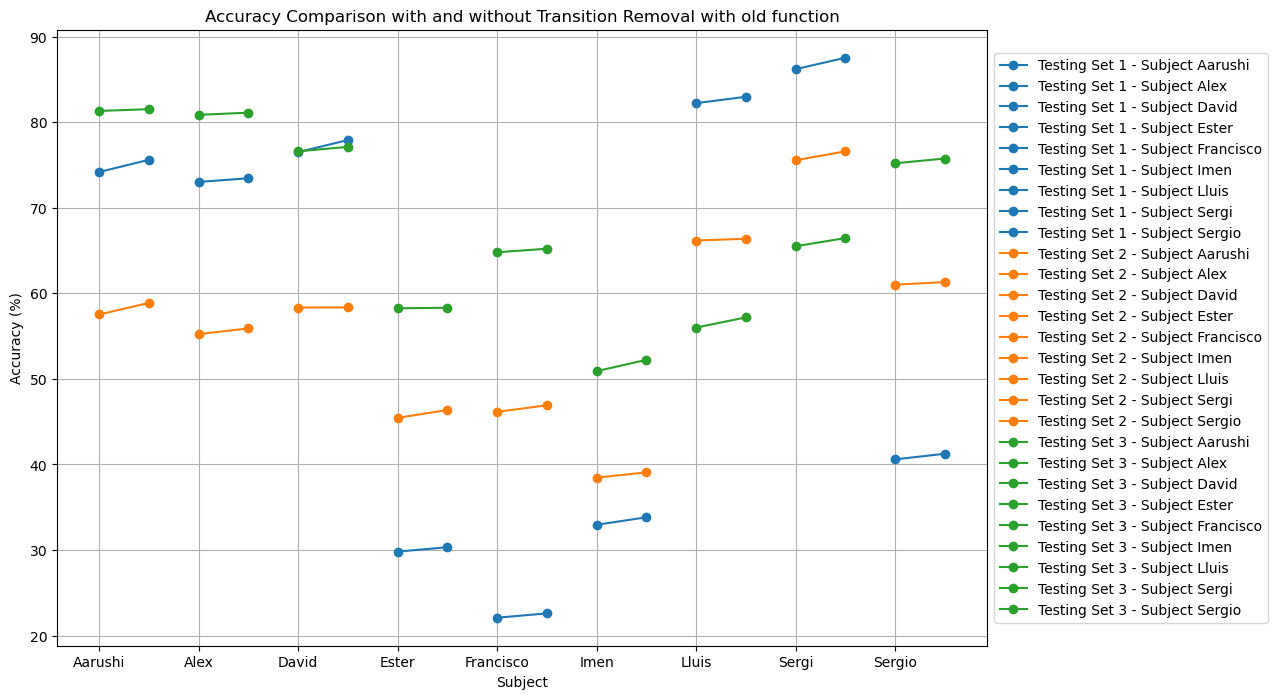

In [6]:
accuracy_matrix = np.load("accuracies with and without transition removal.npy")

# Reshape the accuracy matrix for easier plotting
reshaped_accuracies = accuracy_matrix.reshape((-1, 2))

# Get a colormap
cmap = get_cmap('tab10')

# Plotting
plt.figure(figsize=(12, 8))

for i, train_set in enumerate(train_sets):
    for j, subject in enumerate(subjects):
        # Get accuracies for current subject and training set
        accuracies = reshaped_accuracies[j + len(subjects) * i]

        # Get color based on the testing set index
        color = cmap(i)

        # Plotting lines for accuracies with and without removal
        plt.plot([str(subject), str(subject) + '0.1'], accuracies, marker='o', linestyle='-',
                 label=f'Testing Set {train_set} - Subject {subject}', color=color)

# Add labels and legend
plt.xlabel('Subject')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Comparison with and without Transition Removal with old function')
plt.xticks(subjects)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Place legend outside the plot area
plt.grid(True)

plt.show()

## import personal data


In [1]:
import json

path_to_json_file = "data\Pim1\hand_open_2024-03-07T13-31-05.npy"

data = json.load(open(path_to_json_file, "r"))

all_values_of_value2 = [value for entry in data.values() for value in entry["value1"]]

plt.plot(all_values_of_value2)
plt.show()

all_values_of_value1 = [value for entry in data.values() for value in entry["value1"]]



FileNotFoundError: [Errno 2] No such file or directory: 'data\\Pim1\\hand_open_2024-03-07T13-31-05.npy'